# SYDE 556/750 --- Assignment 1
**Student ID: 20769073**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)


# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

✍


$a^{max}$ = $G$[*$\alpha$ + $J^{bias}$*]    (1) 

0 = $G$[$\alpha$$\xi$ + $J^{bias}$]    (2) 



##### From (1)

$G^{-1}$[$a^{max}$] = *$\alpha$ + $J^{bias}$*

$J^{bias}$ = $G^{-1}$[$a^{max}$] - $\alpha$  (3) 

$\alpha$ = $G^{-1}$[$a^{max}$] - $J^{bias}$    (4) 




##### From (2) 

$G^{-1}$[0] = *$a$ $\xi$ + $J^{bias}$*  

$J^{bias}$ = $G^{-1}$[0] - *$\alpha$ $\xi$*    (5) 

$\alpha$ = ($G^{-1}$[0] - $J^{bias}$) / $\xi$    (6) 


<br>
<br>

##### From (3) and (5) 

$G^{-1}$[$a^{max}$] - $\alpha$ = $G^{-1}$[0] - $\alpha$ $\xi$



##### Gain 

$\alpha$ = ($G^{-1}$[0] - $G^{-1}$[$a^{max}$])  / ($\xi$ - 1)

$\alpha$ = ($J_{th}$ - $G^{-1}$[$a^{max}$])  / ($\xi$ - 1)


<br>
<br>

##### From (4) and (6) 

$G^{-1}$[$a^{max}$] - $J^{bias}$  =  ($G^{-1}$[0] - $J^{bias}$) / $\xi$


$G^{-1}$[$a^{max}$]$\xi$ - $J^{bias}$$\xi$  =  $G^{-1}$[0] - $J^{bias}$


$J^{bias}$$\xi$ - $J^{bias}$ = $G^{-1}$[$a^{max}$]$\xi$ - $G^{-1}$[0]

$J^{bias}$($\xi$ - 1) = $G^{-1}$[$a^{max}$]$\xi$ - $G^{-1}$[0]


##### Bias

$J^{bias}$ = ($G^{-1}$[$a^{max}$]$\xi$ - $G^{-1}$[0] ) / ($\xi$ - 1)

$J^{bias}$ = ($G^{-1}$[$a^{max}$]$\xi$ - $J_{th}$ ) / ($\xi$ - 1)






Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

✍


#### Using previous equations 

$\alpha$ = ($J_{th}$ - $G^{-1}$[$a^{max}$])  / ($\xi$ - 1)


The mapping between $G^{-1}$[$a^{max}$] and its inverse is 1:1 

$\alpha$ = ($J_{th}$ - $a^{max}$)  / ($\xi$ - 1)


Same as above for the bias term 

$J^{bias}$ = ($G^{-1}$[$a^{max}$]$\xi$ - $J_{th}$ ) / ($\xi$ - 1)


$J^{bias}$ = ($a^{max}$$\xi$ - $J_{th}$ ) / ($\xi$ - 1)


**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

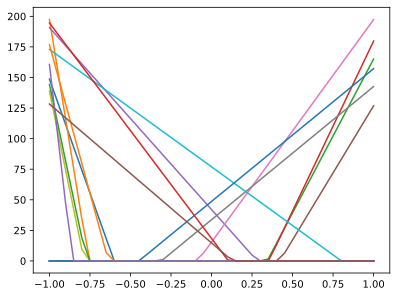

In [2]:
# ✍ 

def create_ReLu_tuning_curve(neurons, plot=True):
    
    A = np.empty((neurons,41))
    a_max = np.random.uniform(100,200, neurons)
    encoders = np.random.choice([-1,1], neurons)
    epsilon = np.random.uniform(-0.95,0.95, neurons)
    J_th = 0 
    x_inputs = np.linspace(-1, 1, 41)

    for neuron in range(neurons):
        gain = (J_th - a_max[neuron]) / (epsilon[neuron] - 1) 
        J_bias = (a_max[neuron] * epsilon[neuron] - J_th) / (epsilon[neuron] - 1) 
        neuron_firing_rates = []
        ReLU_activations = []
        for x in x_inputs:
            firing_rate = (np.dot(encoders[neuron], x) * gain) + J_bias
            ReLu_firing_rate = max(firing_rate, 0) 
            ReLU_activations.append(ReLu_firing_rate)

        neuron_firing_rates = np.asmatrix(ReLU_activations)    
        A[neuron,:] = neuron_firing_rates
        
        if plot: 
            plt.plot(x_inputs,ReLU_activations)
    return x_inputs, A

neurons = 16
X, A = create_ReLu_tuning_curve(neurons)

**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

In [3]:
# ✍ <YOUR SOLUTION HERE>    
# Using A from before 
D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T
X_hat = np.dot(A.T, D.T)
print(X_hat)

[-1.00000000e+00 -9.50000000e-01 -9.00000000e-01 -8.50000000e-01
 -8.00000000e-01 -7.50000000e-01 -7.00000000e-01 -6.50000000e-01
 -5.79207599e-01 -5.42528227e-01 -5.05848856e-01 -4.69169485e-01
 -4.11107966e-01 -3.52131566e-01 -2.95318438e-01 -2.47606592e-01
 -1.99894745e-01 -1.52182899e-01 -1.04471052e-01 -5.27789289e-02
  6.51594533e-04  5.40821180e-02  1.07512641e-01  1.48170415e-01
  2.01243701e-01  2.54316986e-01  2.92735563e-01  3.46617142e-01
  4.07271566e-01  4.53080639e-01  5.01659674e-01  5.50238709e-01
  5.98817744e-01  6.47396779e-01  6.95975814e-01  7.44554849e-01
  7.93133884e-01  8.46811991e-01  9.00629297e-01  9.54446604e-01
  1.00826391e+00]


**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

RMSE: 0.006056908853143906


0.006056908853143906

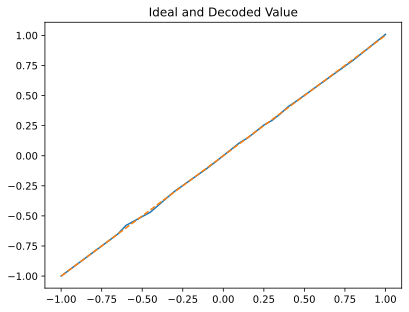

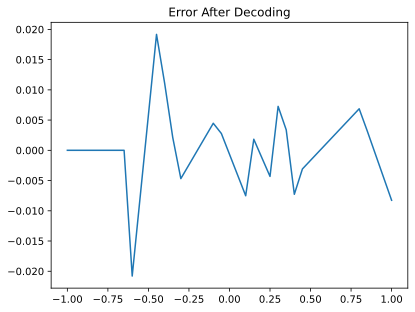

In [4]:
# ✍ 

def calculate_RMSE(x_inputs, A, D):
    x_hat = np.dot(A.T, D.T)
    y = 1*x_inputs + 0
    plt.figure()
    plt.plot(x_inputs, x_hat)
    plt.plot(x_inputs, y, linestyle='dashed')
    plt.title('Ideal and Decoded Value')
    
    MSE = np.square(np.subtract(x_hat,x_inputs)).mean() 
    RMSE = np.sqrt(MSE)

    plt.figure()
    plt.plot(x_inputs, x_inputs.T - x_hat)
    plt.title('Error After Decoding')
    print('RMSE: {0}'.format(RMSE))
    
    return RMSE

calculate_RMSE(X, A, D)

**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

RMSE: 0.9700798312664848


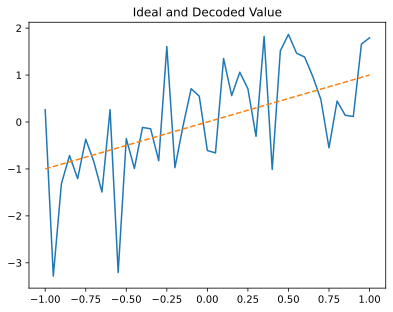

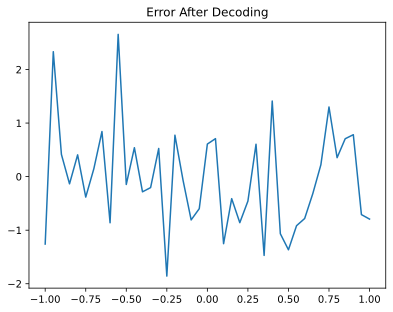

In [5]:
# ✍    
    
sigma = 0.2 *  np.max(A)
mean = 0 
noise = np.random.normal(mean, sigma, (neurons, 41))
A_with_noise = A + noise
D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T
RMSE_for_noisy_A = calculate_RMSE(X, A_with_noise, D)

**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

RMSE: 0.00605690885314393
RMSE: 0.9700798313040286
RMSE: 0.030923800323156916
RMSE: 0.1614697102767232


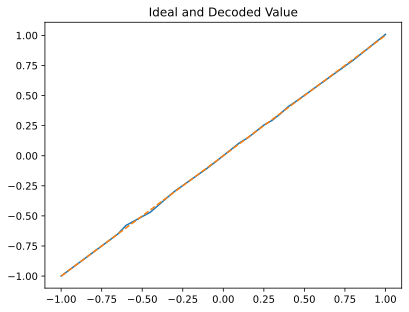

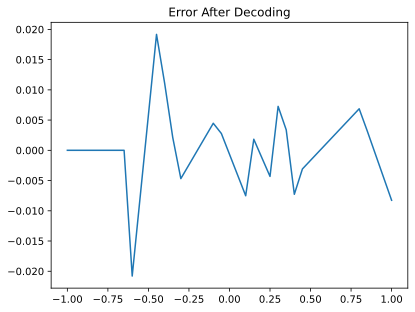

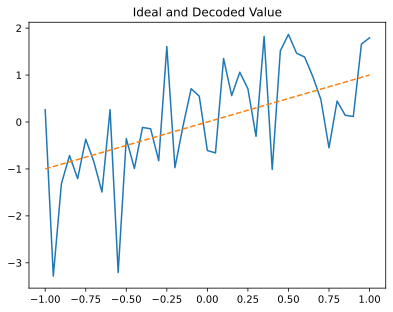

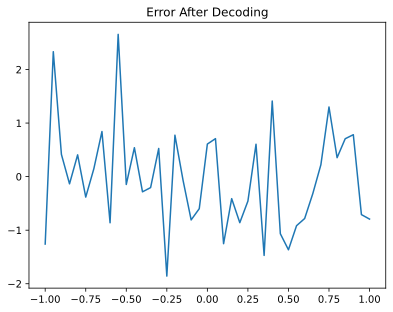

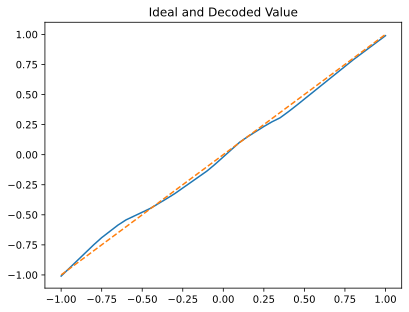

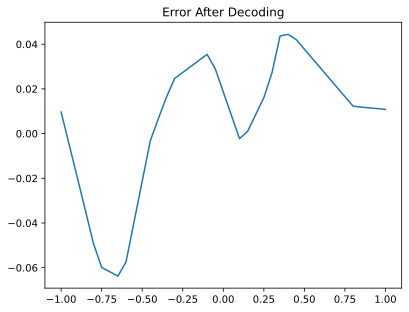

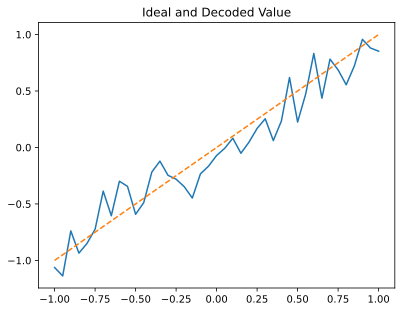

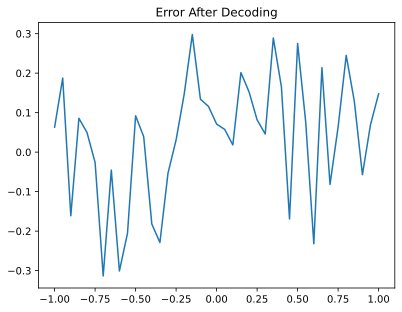

In [6]:
# ✍ 


## without accounting for noise 
D = np.linalg.lstsq(A @ A.T, A @ X.T, rcond=None)[0].T
D_RMSE = calculate_RMSE(X, A, D)
D_noise_RMSE = calculate_RMSE(X, A_with_noise, D)

## accounting for noise 
D_reg_noise = np.linalg.lstsq(A @ A.T + 0.5 * 41 * np.square(sigma) * np.eye(neurons), A @ X.T, rcond=None)[0].T
D_reg_RMSE = calculate_RMSE(X, A, D_reg_noise)
D_reg_noise_RMSE = calculate_RMSE(X, A_with_noise, D_reg_noise)

**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

In [7]:
print('                     ','|  A with noise', '        |  A without noise')
print('Decoder with noise   ','|  {0}'.format(D_reg_noise_RMSE), ' |     {0}'.format(D_reg_RMSE))
print('Decoder without noise','|  {0}'.format(D_noise_RMSE), ' |   {0}'.format(D_RMSE))

                      |  A with noise         |  A without noise
Decoder with noise    |  0.1614697102767232  |     0.030923800323156916
Decoder without noise |  0.9700798313040286  |   0.00605690885314393


As expected, the RMSE is the highest when a decoder that doesn't account for noise is applied on a noisy A matrix. On the contrary, the RMSE is lowest for the decoder that doesn't account for noise and is used on a clean A matrix. There is less variability in noise that is introduced from distortion and the only source of noise is because of the errors in calculating the inverse matrices. 

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

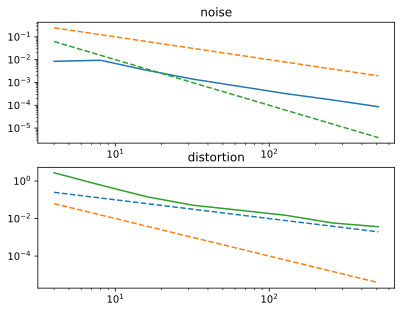

In [8]:
# ✍ <YOUR SOLUTION HERE>


def create_noise(A, num_neurons, sigma_scaling):
    
    X, A = create_ReLu_tuning_curve(num_neurons, plot=False)
    sigma = sigma_scaling *  np.max(A)
    mean = 0 
    noise = np.random.normal(mean, sigma, (num_neurons, 41))
    A_with_noise = A + noise
    D = np.linalg.lstsq(A @ A.T + 0.5 * 41 * np.square(sigma) * np.eye(num_neurons), A @ X.T, rcond=None)[0].T
    X_hat = np.matmul(A_with_noise.T, D.T)    
    E_noise = np.sum(np.square(D)) *0.5 * sigma * sigma 
    E_distortion = np.sum(np.square(X.T - X_hat)) / 2
    return E_distortion, E_noise
    

    
num_neurons_list = [4, 8, 16, 32, 64, 128, 256, 512]
average_distortion_error = [] * len(num_neurons_list) 
average_noise_error = [] * len(num_neurons_list) 

for num_neurons in num_neurons_list: 
    noise_errors = []
    distortion_errors = []
    for y in range(5): 
        E_distortion, E_noise = create_noise(A, num_neurons, 0.1)
        noise_errors.append(E_noise)
        distortion_errors.append(E_distortion)
    average_noise_error.append(np.array(noise_errors).mean())
    average_distortion_error.append(np.array(distortion_errors).mean())


fig = plt.figure() 
ax = fig.subplots(2)
ax[0].plot(num_neurons_list, average_noise_error)
ax[0].set_title('noise')
ax[0].plot(num_neurons_list, [1/(n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, [1/(n) for n in num_neurons_list], linestyle='dashed')
ax[0].plot(num_neurons_list, [1/(n*n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, [1/(n*n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, average_distortion_error)
ax[1].set_title('distortion')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')



**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

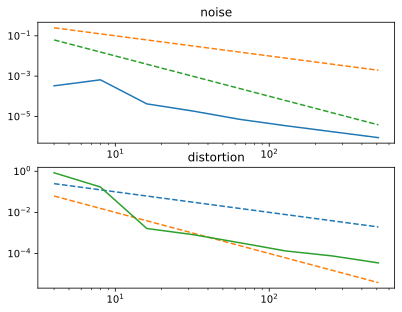

In [9]:

num_neurons_list = [4, 8, 16, 32, 64, 128, 256, 512]
average_distortion_error = [] * len(num_neurons_list) 
average_noise_error = [] * len(num_neurons_list) 

for num_neurons in num_neurons_list: 
    noise_errors = []
    distortion_errors = []
    for y in range(5): 
        E_distortion, E_noise = create_noise(A, num_neurons, 0.01)
        noise_errors.append(E_noise)
        distortion_errors.append(E_distortion)
    average_noise_error.append(np.array(noise_errors).mean())
    average_distortion_error.append(np.array(distortion_errors).mean())


fig = plt.figure() 
ax = fig.subplots(2)
ax[0].plot(num_neurons_list, average_noise_error)
ax[0].set_title('noise')
ax[0].plot(num_neurons_list, [1/(n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, [1/(n) for n in num_neurons_list], linestyle='dashed')
ax[0].plot(num_neurons_list, [1/(n*n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, [1/(n*n) for n in num_neurons_list], linestyle='dashed')
ax[1].plot(num_neurons_list, average_distortion_error)
ax[1].set_title('distortion')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')



**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

✍ As you increase the number of neurons in the system, the overall error in the neural populations go down as shown by the error decreasing more quickly. This is because the random noise and errors from the matrices average out and is more evident when you decrease the deviation in noise with the sigma term between the graphs generated from parts a) and b) . 

## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

G[J] = 1 / Tref - (Trc*ln(1 - 1/J)) for J > 1 

a_max = G[J]

J_th = alpha * x_intercept + J_bias

J_bias = J_th - alpha * x_intercept 

a_max = 1 / Tref - (Trc * ln(1 - 1/J)) = 1 / Tref - (Trc * ln(1 - 1/(alpha + J_bias)))

(Tref - 1/a_max) / Trc = ln(1 - 1/(alpha + Jbias))

e^(Tref - 1/a_max) / Trc) = 1 - 1/(alpha + Jbias))

(alpha + Jbias) - 1 = (alpha + Jbias)) /  e^(Tref - 1/a_max) / Trc)

alpha = (1 /(1 - e^((Tref - 1/a_max) / Trc)) - 1) * (1 / 1 - x_intercept) 

J_bias = 1 - (1 /(1 - e^((Tref - 1/a_max) / Trc))) * (x_intercept / 1 - x_intercept) 





**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

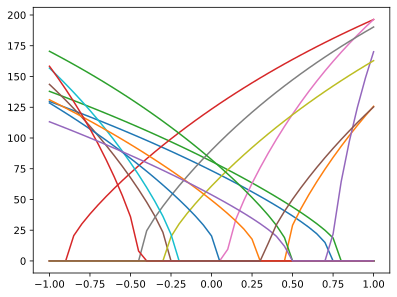

In [10]:
# ✍ 

def create_Leaky_tuning_curve(neurons, plot=True):
    
    A = np.empty((neurons,41))
    a_max = np.random.uniform(100,200, neurons)
    encoders = np.random.choice([-1,1], neurons)
    epsilon = np.random.uniform(-0.95,0.95, neurons)
    J_th = 1
    t_ref = 0.002 
    t_rc = 0.02
    x_inputs = np.linspace(-1, 1, 41)

    for neuron in range(neurons):
        c = (t_ref - (1/a_max[neuron])) / t_rc
        gain = (1/(1-np.exp(c)) - 1) / (1-epsilon[neuron])
        J_bias = 1- (gain*epsilon[neuron]) 
        neuron_firing_rates = []
        leaky_activations = []
        for x in x_inputs:
            J = (np.dot(encoders[neuron], x) * gain) + J_bias
            if J > J_th:
                leaky_firing_rate = 1 / (t_ref -t_rc*np.log(1-(1/J)))
            else:
                leaky_firing_rate = 0 
            leaky_activations.append(leaky_firing_rate)

        neuron_firing_rates = np.asmatrix(leaky_activations)    
        A[neuron,:] = neuron_firing_rates
        
        if plot: 
            plt.plot(x_inputs,leaky_activations)
    return x_inputs, A

neurons = 16
X, A = create_Leaky_tuning_curve(neurons)

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

RMSE: 0.006836261664801651
RMSE: 0.020918445523912373
RMSE: 0.9153950770007141
RMSE: 0.1257464094748846
                      |  A with noise         |   A without noise
Decoder with noise    |  0.1257464094748846  |   0.020918445523912373
Decoder without noise |  0.9153950770007141  |   0.006836261664801651


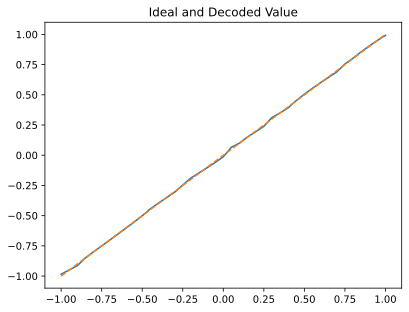

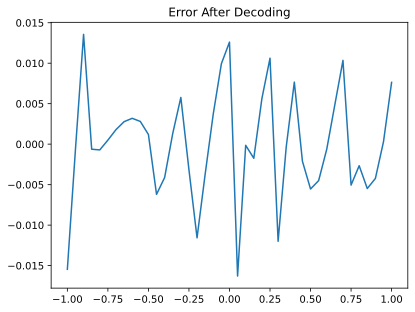

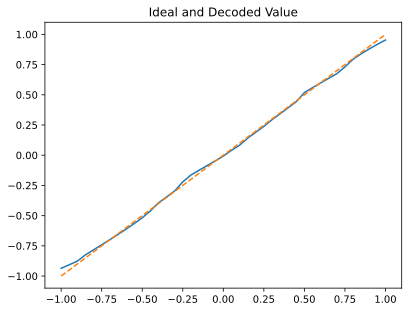

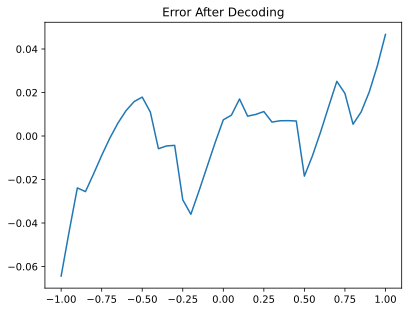

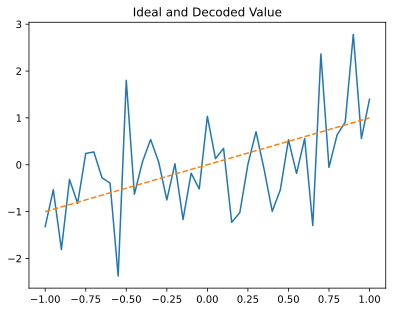

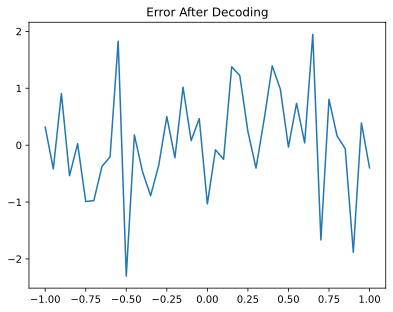

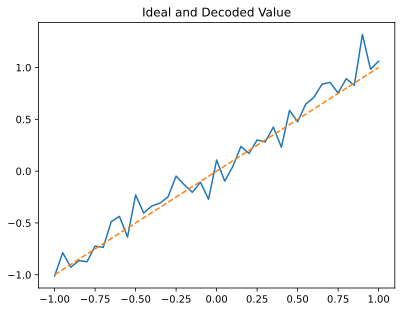

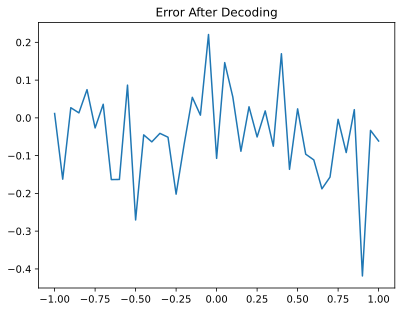

In [11]:
sigma = 0.2 *  np.max(A)
mean = 0 
noise = np.random.normal(mean, sigma, (neurons, 41))
A_with_noise = np.copy(A) + noise

D = np.linalg.lstsq(A.T,X.T, rcond=None)[0].T
D_reg_noise = np.linalg.lstsq(A @ A.T + 0.5 * 41 * np.square(sigma) * np.eye(neurons), A @ X.T, rcond=None)[0].T

D_RMSE = calculate_RMSE(X.T, A, D)
D_reg_RMSE = calculate_RMSE(X.T, A, D_reg_noise)
D_noise_RMSE = calculate_RMSE(X.T, A_with_noise, D)
D_reg_noise_RMSE = calculate_RMSE(X.T, A_with_noise, D_reg_noise)

print('                     ','|  A with noise', '        |   A without noise')
print('Decoder with noise   ','|  {0}'.format(D_reg_noise_RMSE), ' |   {0}'.format(D_reg_RMSE))
print('Decoder without noise','|  {0}'.format(D_noise_RMSE), ' |   {0}'.format(D_RMSE))


# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

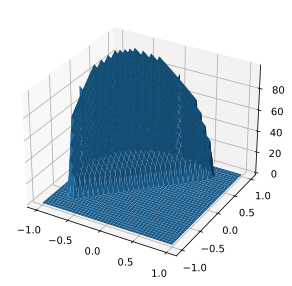

In [12]:
# ✍ <YOUR SOLUTION HERE>

a_max = 100
J_th = 1
t_ref = 0.002 
t_rc = 0.02

J_th = 1
x_1 = np.linspace(-1, 1, 41)
x_2 = np.linspace(-1, 1, 41)
fig = plt.figure()
epsilon = np.array([0,0])
ax = fig.add_subplot(projection='3d')

A = np.empty([41, 41])

for i in range(41): 
    for j in range(41): 
        
        c = (t_ref - (1/a_max)) / t_rc
        gain = (1/(1-np.exp(c)) - 1) / (1-epsilon)
        J_bias = 1- (gain*epsilon)    
        
        X = [x_1[i], x_2[j]]
        
        # at - pi/4, the following are the coordinates 
        encoders = np.matrix([np.sqrt(2)/2, -np.sqrt(2)/2])
        value = np.dot(X, encoders.T)
        J = value * gain + J_bias
        J = J[0,0]
        
        # check if value is within unit circle 
        radius = np.linalg.norm(X)
        

        if (not J > 1) or (radius > 1):
            firing_rate = 0
        else: 
            firing_rate = 1 / (t_ref -t_rc*np.log(1-(1/J)))

        A[i, j] = firing_rate


X1, X2 = np.meshgrid(x_1, x_2)
ax.plot_surface(X1, X2, A)



**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

c0: 56.13739872381234
c1: 1.1455845004285914
c2: -5.415652219977274
c3: 40.6574138821849


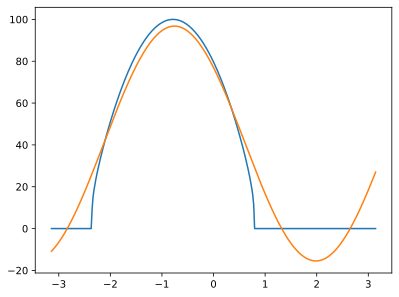

In [13]:
# ✍ <YOUR SOLUTION HERE>

from scipy.optimize import curve_fit


def fitted_curve(theta, c1, c2, c3, c4):
    return (c1*np.cos((c2*theta) + c3)) + c4

a_max = 100
J_th = 1
t_ref = 0.002 
t_rc = 0.02
J_th = 1
thetas = np.linspace(-np.pi, np.pi, 360)
fig = plt.figure()


final_matrix = [None]*360
Z = []

for i, theta in enumerate(thetas): 

    X = [np.cos(theta), np.sin(theta)]
    encoders = np.matrix([np.sqrt(2)/2, -np.sqrt(2)/2])
    value = np.dot(X, encoders.T)
    J = value * gain + J_bias
    J = J[0,0]
    
    # check if value is within unit circle 
    radius = np.linalg.norm(X)
    
    if (not J > 1) or (radius > 1):
        firing_rate = 0
    else: 
        firing_rate = 1 / (t_ref -t_rc*np.log(1-(1/J)))
    Z.append(firing_rate)



p1, p2 = curve_fit(fitted_curve, thetas, Z)

for i in range(len(p1)):
    print('c{0}: {1}'.format(i, p1[i]))
          
plt.plot(thetas, Z)

y_values = []
for i in thetas: 
    y_values.append(fitted_curve(i, p1[0], p1[1], p1[2], p1[3]))
    
plt.plot(thetas, y_values)



**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

✍ The cosine curve is better optimized using the curve fitting algorithm for cosine. Although sine would also work, the algorithm works better for the c3 value that is calculated for the given range of permissible values. The firing rate is higher near angles that are zero for this neuron and so the cosine models its behaviour better. It differs from the ideal curve because there is zero activation outside the permissible range of x values. Furthermore, there is a leaky component that leads to a gradual and then sharp cutoff in activation which isn't modelled well with the cosine function. 

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

(-1.0, 1.0)

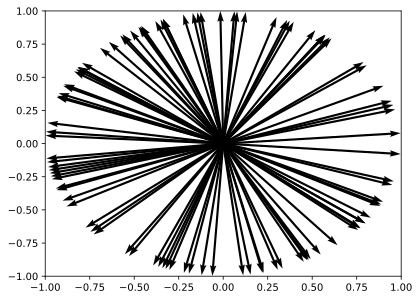

In [14]:
# ✍ <YOUR SOLUTION HERE>

thetas = np.random.uniform(-np.pi, np.pi,100)

encoders= np.empty((100, 2))
for i, theta in enumerate(thetas): 
    vector = [np.cos(theta), np.sin(theta)]
    encoders[i,:] = vector
    
fig, ax = plt.subplots()
starting_positions = np.zeros((100,2))
ax.quiver(starting_positions[:,0], starting_positions[:,1], encoders[:,0], encoders[:,1], angles='xy', scale_units='xy', scale=1)


ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

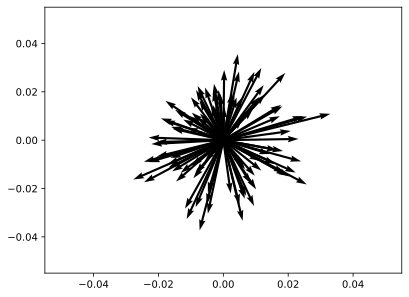

In [15]:
# ✍ <YOUR SOLUTION HERE>

a_max = np.random.uniform(100,200,100)
epsilon = np.random.uniform(-0.95,0.95,100)
J_th = 1
N = 41
x_intercepts = np.linspace(-1, 1, N)
t_ref = 0.002 
t_rc = 0.02
x_1_inputs = np.linspace(-1, 1, N)
x_2_inputs = np.linspace(-1, 1, N)

Neurons = 100
X_vector = np.empty((N*N,2))
all_neurons = np.empty((Neurons, N*N))

sample = 0 
for x_1 in x_1_inputs:
    for x_2 in x_2_inputs:
        X_vector[sample] = [x_1, x_2]
        sample += 1

    
A = np.empty((Neurons, (N*N)))


for neuron in range(100):
    
    c = (t_ref - (1/a_max[neuron])) / t_rc
    gain = (1/(1-np.exp(c)) - 1) / (1-epsilon[neuron])
    J_bias = 1- (gain*epsilon[neuron])
    J_vector = (np.dot(X_vector, encoders[neuron].T,) * gain) + J_bias
    
    for sample in range(len(J_vector)):
        J = J_vector[sample]
        if J > J_th: 
            
            firing_rate = 1 / (t_ref -t_rc*np.log(1-(1/J)))
            # print(firing_rate)
        else: 
            firing_rate = 0 
        A[neuron][sample] = firing_rate 
     

    
sigma = 0.2 *  np.max(A)
mean = 0 
# X_vector = X_vector.T

D = np.linalg.lstsq(A @ A.T + 0.5 * (N*N) * np.square(sigma) * np.eye(Neurons), A @ X_vector, rcond=None)[0]
fig, ax = plt.subplots()
starting_positions = np.zeros((100,2))
ax.quiver(starting_positions[:,0], starting_positions[:,1], D[:,0], D[:,1], scale=0.0015)

**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

✍ The decoding vectors still contain the different angles, however they are a lot more variable in magnitudes. The distribution of the encoding vectors are a lot more uniform and the values themselves are a lot larger in magnitudes. 

**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

0.10305625703589617


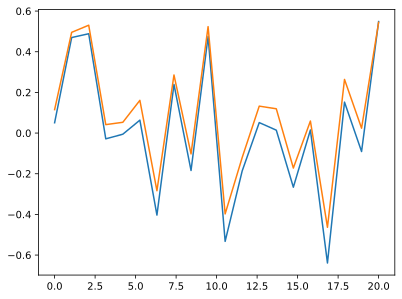

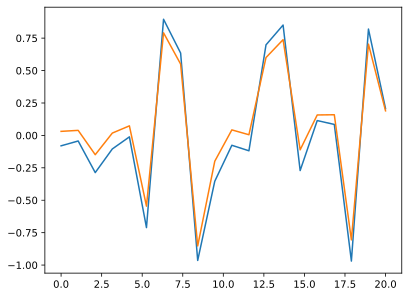

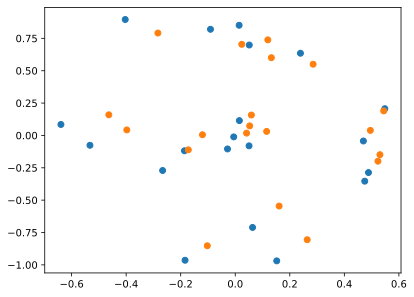

In [16]:
# ✍ <YOUR SOLUTION HERE>

a_max = np.random.uniform(100,200,100)
epsilon = np.random.uniform(-0.95,0.95,100)
J_th = 1
N = 20
x_intercepts = np.linspace(-1, 1, N)
t_ref = 0.002 
t_rc = 0.02
x_intercepts_1 = np.linspace(-1, 1, N)
x_intercepts_2 = np.linspace(-1, 1, N)

x_vector = np.empty((20,2))
A = np.empty((100, 20))

magnitudes = np.array(np.random.uniform(0,1,20))
directions = np.array(np.random.uniform(-np.pi, np.pi, 20))  

for i in range(20): 
    x_vector[i,:] = [magnitudes[i] * np.cos(directions[i]), magnitudes[i] * np.sin(directions[i])]


for neuron in range(100):        
    c = (t_ref - (1/a_max[neuron])) / t_rc
    gain = ((1/(1-np.exp(c))) - 1) / (1-epsilon[neuron])
    J_bias = 1- (gain*epsilon[neuron]) 
    
    for sample in range(20):
        J = (np.dot(x_vector[sample, :], encoders[neuron]) * gain) + J_bias

        if J > J_th: 
            firing_rate = 1 / (t_ref -t_rc*np.log(1-(1/J)))
        else: 
            firing_rate = 0 
        A[neuron][sample] = firing_rate 
                                                                                  
x_hat = np.dot(A.T, D)
RMSE = np.sqrt(np.mean(np.square(x_hat - x_vector)))
print(RMSE)


plt.plot(np.linspace(0,20, 20), x_vector[:,0])
plt.plot(np.linspace(0,20, 20),  x_hat[:,0])

plt.figure()

plt.plot(np.linspace(0,20, 20), x_vector[:,1])
plt.plot(np.linspace(0,20, 20),  x_hat[:,1])

x_hat = np.array(x_hat)
plt.figure() 

plt.scatter(x_vector[:,0], x_vector[:,1])
plt.scatter(x_hat[:,0], x_hat[:,1])



**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

[[ 0.53346385  0.99582969  0.862399   -0.26228877 -0.44386089  0.08892968
  -0.41071274  0.35234831 -0.18750198  0.8021873  -0.98992899 -0.84336724
   0.07344887  0.01668779 -0.70094152  0.13097368 -0.99134977  0.15507086
  -0.11008494  0.93570935]
 [-0.84582287 -0.09123175 -0.50622915 -0.96498943 -0.8960957  -0.99603791
   0.91176479  0.93586894 -0.98226422 -0.59707246 -0.14156478 -0.5373376
   0.99729898  0.99986075 -0.71321875  0.99138585  0.13124649 -0.98790335
   0.99392218  0.35277189]]
1664.3427654249438
0.5347417247319761
(2, 20)


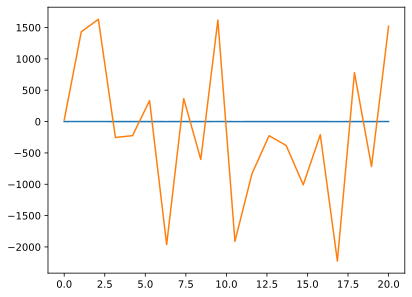

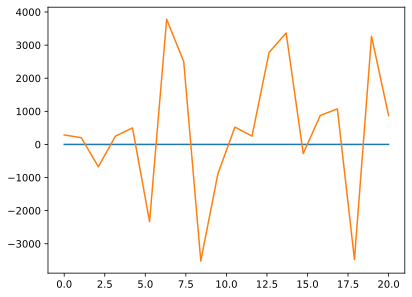

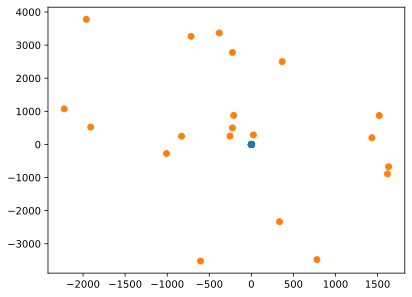

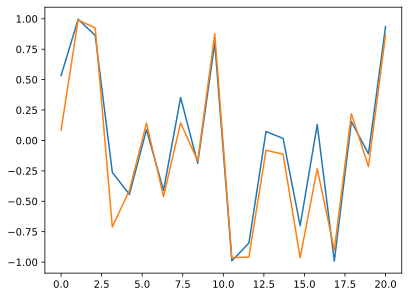

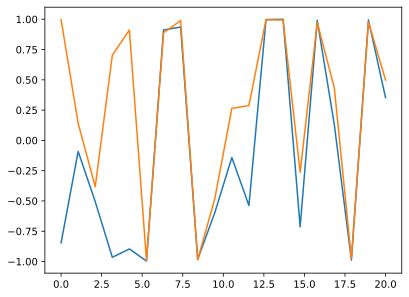

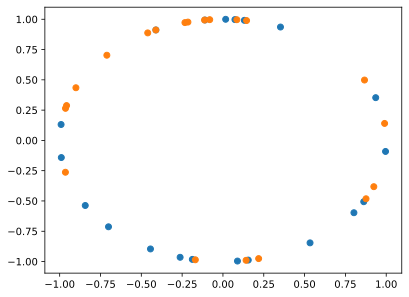

In [17]:
# ✍ <YOUR SOLUTION HERE>

x_hat = np.dot(A.T, encoders)

# x_hat = (x_hat - np.min(x_hat)) /(np.max(x_hat) - np.min(x_hat))
x_hat_normalized = x_hat.T/np.linalg.norm(x_hat, axis=-1).T
x_normalized = x_vector.T/np.linalg.norm(x_vector, axis=-1).T
print(x_normalized)

RMSE = np.sqrt(np.mean(np.square(x_hat - x_vector)))
print(RMSE)


# x_hat_normalized = np.linalg.norm(x_hat)
# x_normalized = np.linalg.norm(x_vector)

RMSE_normalized = np.sqrt(np.mean(np.square(x_hat_normalized - x_normalized)))
print(RMSE_normalized)

plt.figure()

plt.plot(np.linspace(0,20, 20), x_vector[:,0])
plt.plot(np.linspace(0,20, 20),  x_hat[:,0])

plt.figure()

plt.plot(np.linspace(0,20, 20), x_vector[:,1])
plt.plot(np.linspace(0,20, 20),  x_hat[:,1])

plt.figure()
plt.scatter(x_vector[:,0], x_vector[:,1])
plt.scatter(x_hat[:,0], x_hat[:,1])


# Normalized 

plt.figure()

print(x_normalized.shape)
plt.plot(np.linspace(0,20, 20), x_normalized[0,:])
plt.plot(np.linspace(0,20, 20),  x_hat_normalized[0,:])

plt.figure()

plt.plot(np.linspace(0,20, 20), x_normalized[1,:])
plt.plot(np.linspace(0,20, 20),  x_hat_normalized[1,:])

plt.figure()
plt.scatter(x_normalized[0,:], x_normalized[1,:])
plt.scatter(x_hat_normalized[0,:], x_hat_normalized[1,:])

**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

✍ This is the case because the encoders contain similar angular information which is preserved. The magnitudes are different but since it isn't being considered here, the encoders do a fairly well job. Furthermore, in high dimensional spaces, random unit vectors should average to a lower angular noise. The merit of using an encoder as a decoder is that it requires a lot less computational power and can still preserve most of the angular information. However, using a decoder as a decoder results in a more accurate matrix that contains the magnitudes and angles when inverting. 